# Phase Lead/Phase Lag Compensators

In [ ]:
#| default_exp lead_lag_compensators

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control

## Standard Feedback loop

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/standard-control-loop.png" alt="standard-control-loop" style="width: 550px;"/> </td>
</tr>
</table>

**Controller $R(s)$:**
- Converts the error term into an actuator command
- We are free to choose any control scheme we like.
- As long as the closed loop performance of the system meets our requirements

Note: controller = compensator


- Lead and lag compensators are used quite extensively in control. 
- A lead compensator can increase the stability or speed of reponse of a system; 
- A lag compensator can reduce (but not eliminate) the steady-state error. 
- Depending on the effect desired, one or more lead and lag compensators may be used in various combinations.
- Lead, lag, and lead/lag compensators are usually designed for a system in transfer function form.

## Preliminary Design Consideration

- The root-locus plot of a system may indicate that the desired performance cannot be achieved just by the adjustment of gain (or some other adjustable parameter). 
- For example, the system may not be stable for all values of gain (or other adjustable parameter). 
- It is necessary to reshape the root loci to meet the performance specifications.

- The design problems are of improving system performance by insertion of a compensator. 
- Which means designing a filter whose characteristics tend to compensate for the undesirable and unalterable characteristics of the plant.

## Design by Root-Locus Method. 

- Re-shaping the root locus of the system by adding poles and zeros to the system’s open-loop transfer function and forcing the root loci to pass through desired closed-loop poles in the s plane

- The characteristic of the root-locus design is its being based on the assumption that the closed-loop system has a pair of dominant closed-loop poles.

- Effects of zeros and additional poles do not affect the response characteristics very much.

_in the design by the root-locus method, the root loci of the system are reshaped through the use of a compensator so that a pair of dominant closed-loop poles can be placed at the desired location._

## Series Compensation and Parallel (or Feedback) Compensation

### Series Compensation

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/compensator-series.png" alt="compensator-series" style="width: 550px;"/> </td>
</tr>
</table>

- the compensator $G_c(s)$ is placed in series with the plant. This scheme is called series compensation.


### Parallel or Feedback Compensation
<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/compensator-parallel.png" alt="compensator-parallel" style="width: 550px;"/> </td>
</tr>
</table>

- An alternative to series compensation is to feed back the signal(s) from some ele- ment(s) and place a compensator in the resulting inner feedback path. Such compensation is called parallel compensation or feedback compensation.

### Comments

- The problem usually boils down to a suitable design of a series or parallel compensator. 
- The choice between series compensation and parallel compensation depends on the nature of the signals in the system, the power levels at various points, available components, the designer’s experience, economic considerations, and so on.

- If a compensator is needed to meet the performance specifications, the designer must realize a physical device that has the prescribed transfer function of the compensator.

- Phase lead/lag compensators and networks
  - If a sinusoidal input is applied to the input of a network, and the steady-state output (which is also sinusoidal) has a phase lead, then the network is called a lead network. (The amount of phase lead angle is a function of the input frequency.) 
  - If the steady-state output has a phase lag, then the network is called a lag network. 
  - In a lag–lead network, both phase lag and phase lead occur in the output but in different frequency regions; phase lag occurs in the low-frequency region and phase lead occurs in the high-frequency region. 
  - A compensator having a characteristic of a lead network, lag network, or lag–lead network is called a lead compensator, lag compensator, or lag–lead compensator.

- PID controllers are also frequently used (see `16_PID_Control.ipynb`)



- We will use the **root-locus or frequency-response** methods to design the compensators
    - The root-locus approach to design is very powerful when the specifications are given in terms of time-domain quantities, such as the damping ratio and undamped natural frequency of the desired dominant closed-loop poles, maximum overshoot, rise time, and settling time.

- Note that the final result might not be unique! The best or optimal solution might not be precisely defined by the time-domain or frequency-domain specifications.

### Effects of the Addition of Poles

- Adding poles to the open-loop TF tend to pull the root locus to the right
- This lowers the system’s relative stability and slows down the settling of the response

_Remember that the addition of integral control adds a pole at the origin, thus making the system less stable_

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/compensator-adding-a-pole.png" alt="compensator-adding-a-pole" style="width: 550px;"/> </td>
</tr>
</table>


### Effects of the Addition of Zeros

- Adding zeros to the open-loop transfer function has the effect of pulling the root locus to the left
- This makes the system more stable and speeds up the settling of the response.

_the addition of a zero in the feedforward transfer function means the addition of derivative control to the system. The effect of such control is to introduce a degree of anticipation into the system and speed up the transient response._

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/compensator-adding-a-zero.png" alt="compensator-adding-a-zero" style="width: 550px;"/> </td>
</tr>
</table>


## Phase Lead

- What is phase lead

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensators-derivative.png" alt="lead-lag-compensators-derivative" style="width: 350px;"/> </td>
</tr>
</table>

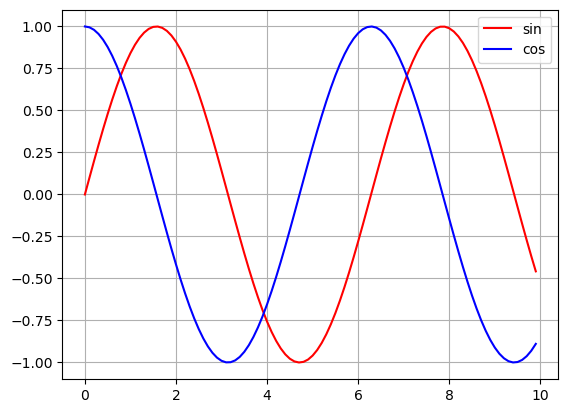

In [ ]:
t = np.arange(0, 10, 0.1)
plt.plot(t, np.sin(t), color='r', label='sin');
plt.plot(t, np.cos(t), color='b', label='cos');
plt.legend();
plt.grid()

- The $cos$ signal is ahead of the $sin$ signal by $90$ deg
- _The output leads the input by 90 deg_

We can plot the Bode plots:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/zero-bode.png" alt="zero-bode" style="width: 550px;"/> </td>
</tr>
</table>

- Differentiation gives positive phase
- Integration gives negative phase (Mirrors the derivative plot)

- A zero in a transfer function adds phase
- A pole in a transfer function subtracts phase

- Lead compensator: adds phase (at least in some frequency range of interest)
- Lag compensator: subtracts phase (at least in some frequency range of interest)

### Equations

#### Lead compensator

$$
R(s) = \frac{\frac{s}{w_z}+1}{\frac{s}{w_p}+1} = \frac{w_p}{w_z}\frac{s + w_z}{s + w_p}
$$

- one real pole and one real zero
- $w_z < w_p$
- $K=\frac{w_p}{w_z}$ (gain)
- We can take care of the gain easily (e.g., using the root locus method)


#### Lag compensator

$$
R(s) = \frac{\frac{s}{w_z}+1}{\frac{s}{w_p}+1} = \frac{w_p}{w_z}\frac{s + w_z}{s + w_p}
$$

- one real pole and one real zero
- $w_z > w_p$
- $K=\frac{w_p}{w_z}$ (gain)

## Bode plot: Lead Compensator

$$
R(s) = \frac{w_p}{s + w_p}\frac{s + w_z}{w_z}
$$

Let's look at the zero-pole contribution separately:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-lead-bode-plot.png" alt="lead-lag-compensator-lead-bode-plot.png" style="width: 550px;"/> </td>
</tr>
</table>

- The zero adds 90 deg and amplifies high frequencies
- The pole subtracts 90 deg and attenuates high frequencies

- Multiplying the two T.F. together means adding everything together on the Bode plot
- Lead compensator:
   - Behaves like a real zero early on, at low frequency
   - Until the real pole pulls it back at high frequency
   - See blue line for its approximate representation

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-lead-bode-plot-1.png" alt="lead-lag-compensator-lead-bode-plot.png" style="width: 550px;"/> </td>
</tr>
</table>

Note:
- A lead compensator _increases_ the gain at high frequency (but less than a real zero would do)
- This means that it is less noisy than a derivative controller on its own
- A lead compensator _adds_ phase between the two corner frequencies and no phase outside
- Moving the two frequency means we can change where we add our phase

- What do we expect a Lag compensator to do?

## Example

Let's see an example:

In [ ]:
# w_z < w_p (lead compensator)
w_z = 1
w_p = 10

In [ ]:
# define the usual s variable
s = control.tf([1, 0], [1])

In [ ]:
# Compensator transfer function
R_s = w_p/(s+w_p)*(s+w_z/w_z)

We can plot the zero (blue) and the pole (orange) parts together with the combined Bode plot (green):

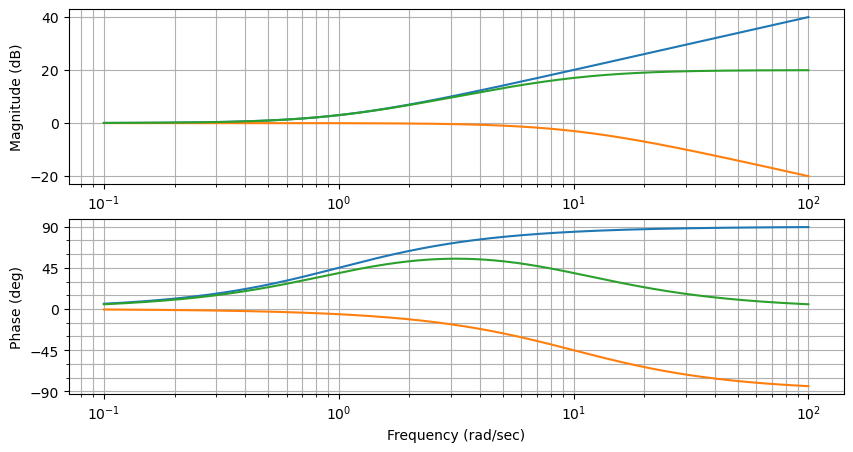

In [ ]:
fig, axs = plt.subplots(1, figsize=(10,5))

# zero (blue)
control.bode_plot((s+w_z)/w_z, dB=True, omega_limits = [0.1, 100], wrap_phase =True);
# pole (orange)
control.bode_plot(w_p/(s+w_p), dB=True, omega_limits = [0.1, 100], wrap_phase =True);

# compensator (green)
control.bode_plot(R_s, dB=True, omega_limits = [0.1, 100], wrap_phase =True);

# Note: If wrap_phase is True the phase will be restricted to the range [-180, 180) (or [-\pi, \pi) radians)

- What happens when we move the zero closer to the pole?

In [ ]:
# w_z < w_p (lead compensator)
w_z = 5
w_p = 10

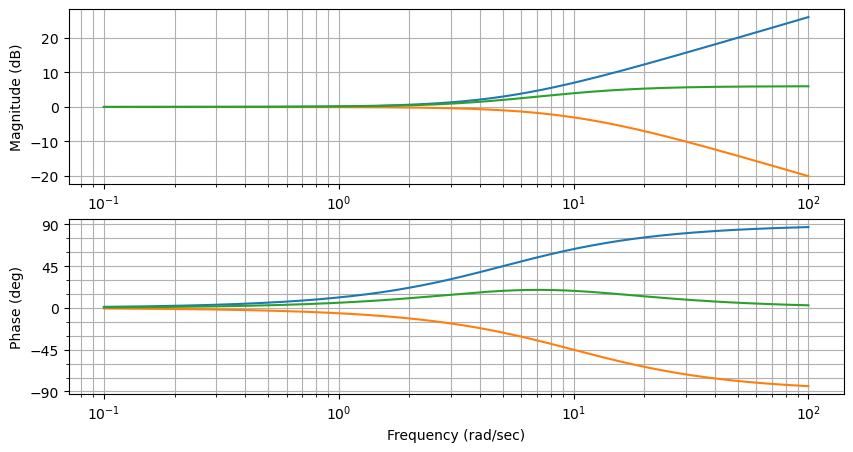

In [ ]:
fig, axs = plt.subplots(1, figsize=(10,5))

# zero (blue)
control.bode_plot((s+w_z)/w_z, dB=True, omega_limits = [0.1, 100], wrap_phase =True);
# pole (orange)
control.bode_plot(w_p/(s+w_p), dB=True, omega_limits = [0.1, 100], wrap_phase =True);

# compensator transfer function (green)
R_s = w_p/(s+w_p)*(s+w_z)/w_z
control.bode_plot(R_s, dB=True, omega_limits = [0.1, 100], wrap_phase =True);

- Still a phase lead is present, but much smaller
- What happens if the zero is right on top of the pole?

In [ ]:
!cat answers/solution_lead_lag_compensator-1

They cancel each other out.

- if $w_p$ < $w_z$ we obtain a **lag compensator**

In [ ]:
# w_z > w_p (lag compensator)
w_z = 50
w_p = 10

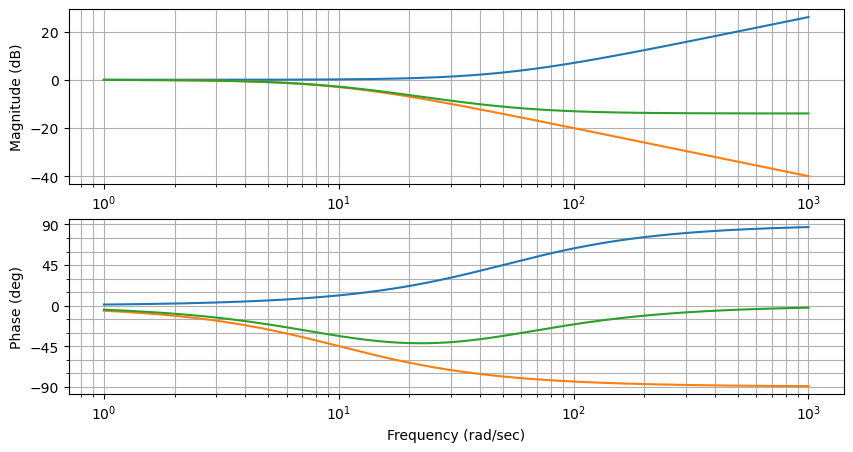

In [ ]:
fig, axs = plt.subplots(1, figsize=(10,5))
# zero (blue)
control.bode_plot((s+w_z)/w_z, dB=True, omega_limits = [1, 1000], wrap_phase =True);
# pole (orange)
control.bode_plot(w_p/(s+w_p), dB=True, omega_limits = [1, 1000], wrap_phase =True);

# compensator transfer function (green)
R_s = w_p/(s+w_p)*(s+w_z)/w_z
control.bode_plot(R_s, dB=True, omega_limits = [1, 1000], wrap_phase =True);

- The zero affects the system at higher frequency
- The system behaves like a real pole at lower frequency
- Until the zero comes into effect and "cancels" the pole at higher frequency
- This add _phase lag_ to the system

**Note:** The same transfer function structure can produce phase lead or lag, adjusting the relative position of the pole and the zero

## Lead/Lag compensators

- Design a compensator that uses both a lead and a lag compensator:

$$
R(s) = \frac{\frac{s}{w_z}+1}{\frac{s}{w_p}+1}
       \frac{\frac{s}{w_{z_1}}+1}{\frac{s}{w_{p_1}}+1}
= \frac{w_p}{w_z}\frac{s + w_z}{s + w_p}\frac{w_{p_1}}{w_{z_1}}\frac{s + w_{z_1}}{s + w_{p_1}}
$$


In [ ]:
# # Lead compensator
w_z = .5
w_p = 1

R_Lead = w_p/(s+w_p)*(s+w_z)/w_z

# Lag compensator
w_z1 = 15
w_p1 = 5


R_Lag = w_p1/(s+w_p1)*(s+w_z1)/w_z1

Plot the pole zero map for the Lead compensator:

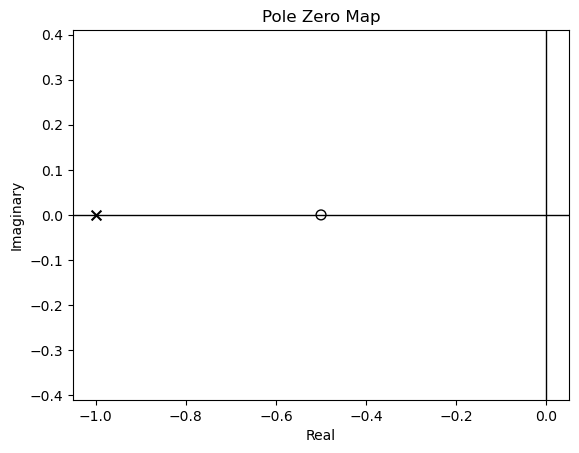

In [ ]:
control.pzmap(R_Lead);

Plot the pole zero map for the Lag compensator:

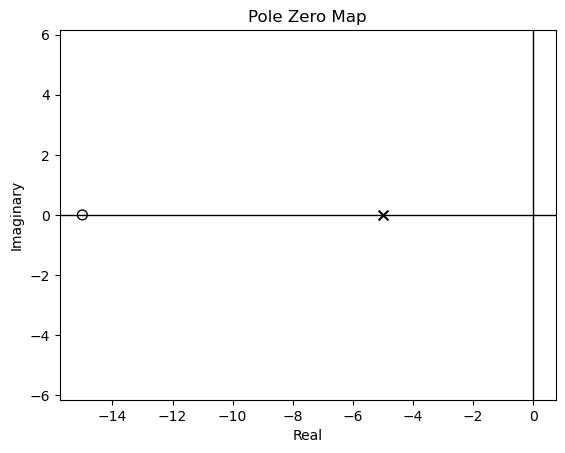

In [ ]:
control.pzmap(R_Lag);

We construct the Lead-Lag compensator:

In [ ]:
# Lead-Lag compensator transfer function
R_LL = R_Lead*R_Lag

And we can plot the Bode Plot to see what the phase does:

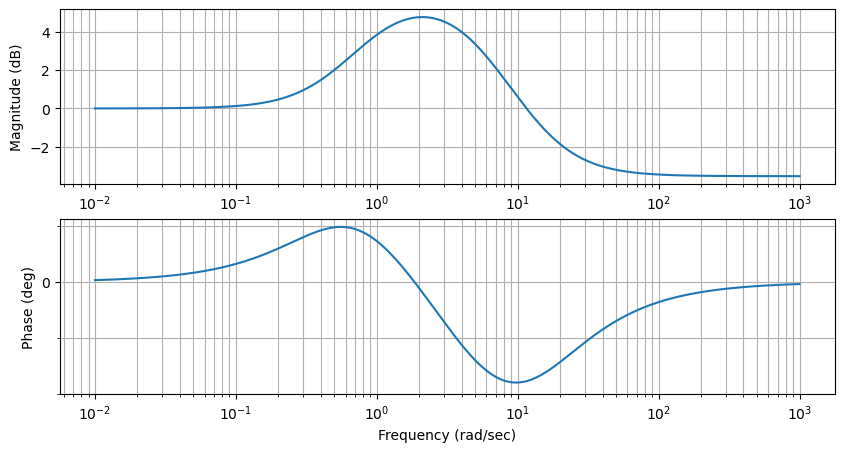

In [ ]:
fig, axs = plt.subplots(1, figsize=(10,5))
control.bode_plot(R_LL, dB=True, omega_limits = [.01, 1000], wrap_phase =True);

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-lead-lag-bode-plot-annotated.png" alt="lead-lag-compensator-lead-lag-bode-plot" style="width: 550px;"/> </td>
</tr>
</table>


- This compensator is leading at low frequency, and lagging at higher frequency

## Designing a Lead Compensator with the Root Locus

- Let's consider our control loop again:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/standard-control-loop.png" alt="standard-control-loop" style="width: 550px;"/> </td>
</tr>
</table>

- We have a model of our plant $G(s)$
   - we are given a transfer function
   - we have identified the model
   
- Design requirements - performance goal:
  - Stability
  - Rise time
  - Settling time
  - Max Overshoot
  - Damping ratio
  - Gain/Phase margin

- $G(s)$ alone does not meet our requirements
- We need to design the controller $R(s)$



- **How do we choose $R(s)$?**

### Procedures for designing a lead compensator with the Root Locus

1. From the performance specifications, determine the desired location for the dominant closed-loop poles.
2. Draw the Root Locus of the original system (uncompensated) and verify whether gain adjustments alone is enough to obtain the desired closed-loop poles.
3. Assume the lead compensator to be:

$$
R(s) = \frac{\frac{s}{w_z}+1}{\frac{s}{w_p}+1} = \frac{w_p}{w_z}\frac{s + w_z}{s + w_p}
$$

where $w_z < w_p$ and can be determine from angle conditions and requirements of open-loop gain.

4. Determine the value of the gain from the magnitude condition
5. Check that the compensated system meets all performance specification. If not repeat changing the position of the pole and zero.




Let's consider:

$$
G(s) = \frac{1}{(s+2)(s+4)}
$$

- What is the Root Locus of $G(s)$?

In [ ]:
!cat answers/solution_lead_lag_compensator-2

Angles of asymptotes:

Phi_A = (2q+1)/(n-m) * 180 = 90, 270

where q=0, 1, 2, ..., (n-m-1)

And the centroid of the asymptotes is

C = (sum(Finite poles)-sum(Finite zeros))/(n-m) = -3


In [ ]:
s = control.tf([1, 0],[1])

In [ ]:
G_s = 1/((s+2)*(s+4))

<IPython.core.display.Javascript object>


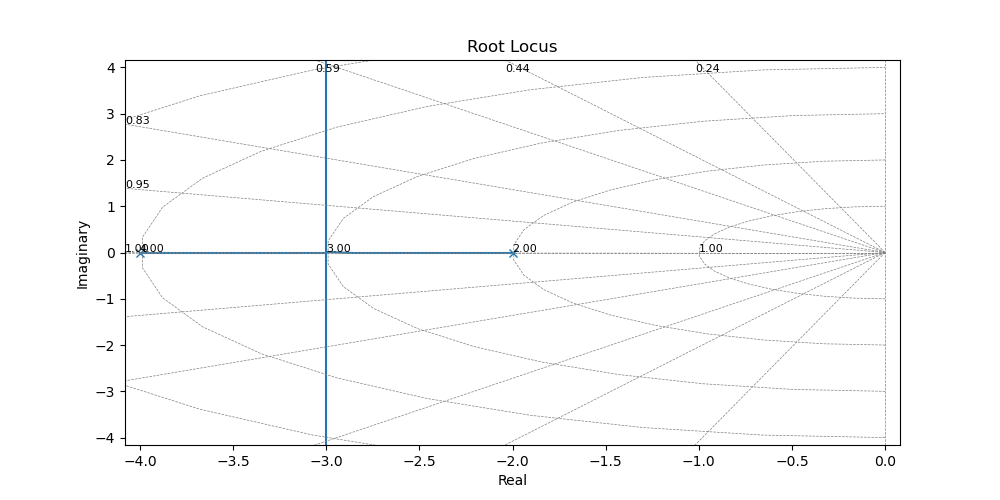

In [ ]:
fig, axs = plt.subplots(1, figsize=(10,5))
control.rlocus(G_s);

- What if we had a Lead compensator?
- How does the root locus change?

Let's choose, arbitrarily, a Lead compensator ($w_z < w_p$):

$$
R(s) = \frac{(s+5)}{(s+6)}
$$

In [ ]:
!cat answers/solution_lead_lag_compensator-3

Poles = -2, -4 (from the system), -6 (from the compensator)
Zeros = -5 (from the compensator)

n - m = 3 - 1 = 2
q = 0, 1

Phi_A = (2q+1)/(n-m) * 180 = 90, 270

C = (sum(Finite poles)-sum(Finite zeros))/(n-m) = ((-2-4-6) - (-5) )/(2) = (-12+5)/2 = -7/2 = -3.5

Note: the centroid C is not the breakaway point from the real axis.

Let's see how it looks like with Python:

We define the controller:

In [ ]:
R_s = (s+5)/(s+6)

Plot the Root Locus:

<IPython.core.display.Javascript object>


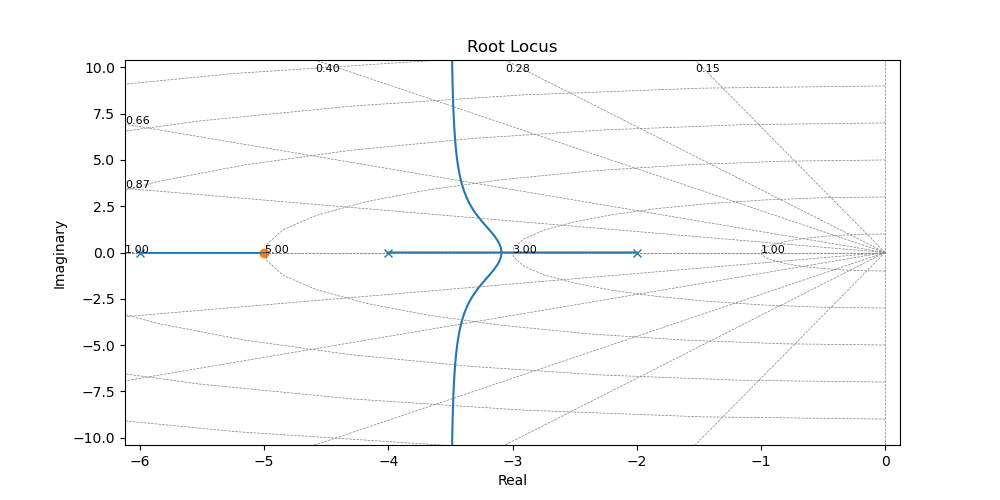

In [ ]:
fig, axs = plt.subplots(1, figsize=(10,5))
control.rlocus(G_s*R_s);

With a lead compensator:
- We have moved the asynmptotes further into the left half plane
- Increasing the gain $K$ the close loop poles would be more to the left: we have added stability to the system

**How does this help us?**
- When we use the root locus method we typically know where we would like our dominant closed loop poles to be so that we meet our requirements
- _With the root locus method, we first convert our requirements into pole locations_

- We need a lead compensator if we need to move our poles to the left of where our current (uncompensated) poles are
- We need a lag compensator if we need to move our poles to the right of where our current (uncompensated) poles are
- If the root locus already goes through the desired locations, we only need to choose the correct gain
  - Note: we could still have a steady state error problem, but we know how to fix this already

- Given desired poles, solving for the compensator becomes a trigonometry problem:

- To be part of the Root Locus: $\sum{\angle Poles} - \sum{\angle Zeros} = 180^o$


For example, for our system we saw that the root locus is:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-root-locus-1.png" alt="lead-lag-compensator-root-locus-1" style="width: 250px;"/> </td>
</tr>
</table>

- There are no zeros (so we do not need to subtract)
- The sum of $\theta_1+\theta_2$=180 because that point is part of the root locus

Given our system:
$$
G(s) = \frac{1}{(s+2)(s+4)}
$$

If we want poles:

$$s_d = -4 \pm 2j$$

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-root-locus-2.png" alt="lead-lag-compensator-root-locus-1" style="width: 250px;"/> </td>
<td> <img src="img/lead-lag-compensator-root-locus-3.png" alt="lead-lag-compensator-root-locus-1" style="width: 250px;"/> </td>
</tr>
</table>

And if we sum up all the angles: $90+(90+\theta)$ = $90+(90+45)$ = 225

- since $\theta = \tan^{-1}(2/2) = \tan^{-1}(1) = 45$

And of course, this is not on the Root Locus. 

- To have it on the Root Locus, we need to remove 45 deg of phase
- Using a phase lead compensator we can do it adding a single pole and a single zero:

$$
225 + (\theta_p - \theta_z) = 180
$$

- $(\theta_p - \theta_z)$ is our lead compensator

- If we pick a zeros at -5
   - $\theta_z= 63.43 ^o$
- The pole must go into one specific location: 
   - $\theta_p=180-225+63.43=18.43$

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-root-locus-4.png" alt="lead-lag-compensator-root-locus-4" style="height: 350px;"/> </td>
<td> <img src="img/lead-lag-compensator-root-locus-5.png" alt="lead-lag-compensator-root-locus-4" style="height: 350px;"/> </td>
</tr>
</table>

In [ ]:
!cat answers/solution_lead_lag_compensator-4

If beta is the angle of the pole of the compensator:

tan(beta) = 2/p

p = 2/tan(beta)

beta = 18.43
beta_rad = 18.43*np.pi/180 = .321

p = 2/tan(beta) = 2/tan(.321) = -6.015

the pole location is:

s = p+4 = -10.015

The compensator for this particular problem is:

$$
R(s) = \frac{s+5}{s+10.015}
$$

<IPython.core.display.Javascript object>


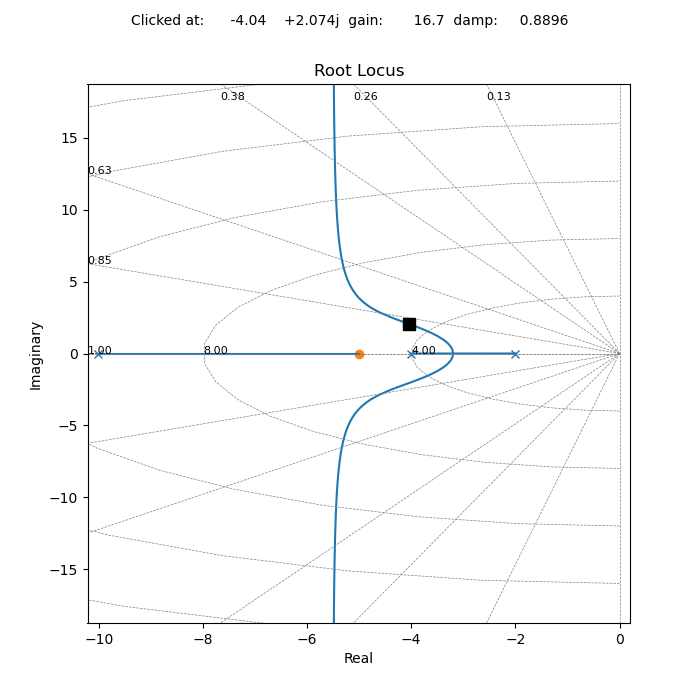

In [ ]:
%matplotlib notebook
R_s = (s+5)/(s+10.015)
fig, axs = plt.subplots(1, figsize=(7,7))
control.rlocus(G_s*R_s);

**One more step**: 
- We need to calculate the gain that moves the poles in closed loop where we want them

$$
\frac{KG(s)R(s)}{1+KG(s)R(s)}
$$

We can then find:

$$
K = \frac{-1}{1+G(s)R(s)}\Big|_{s=-4 + 2 j} \approx 16
$$

Note: Why is K chosen in this way?

### Choosing the first zero

- No hard and fast rule
- We need to have enough negative angle to bring the sum to 180 deg 
- Pay attention not to interfere with your dominat poles
   - For example, if you had:
   
<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-root-locus-6-1.png" alt="lead-lag-compensator-root-locus-6" style="height: 350px;"/> </td>
</tr>
</table>

We can then sketch bounds:
   <table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-root-locus-6-2.png" alt="lead-lag-compensator-root-locus-6" style="height: 350px;"/> </td>
</tr>
</table>

_Rule fo thumb: place your zero at or closely to the left of the second real axis open loop pole_ 

- Does not guarantee that overshoot requirements will be met
- Trial and error might be needed
- With higher order systems, might be difficult to predict where other non-dominant poles go: we must avoid making them unstable
- Faster responding system means responding to noise as well.

### Example

   <table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/compensator-example.png" alt="compensator-example" style="height: 150px;"/> </td>
</tr>
</table>


$$
G(s) = \frac{10}{s(s+1)}
$$


In [ ]:
s = control.tf([1,0],[1])

In [ ]:
G_s = 10/(s*(s+1))
print(G_s)


  10
-------
s^2 + s



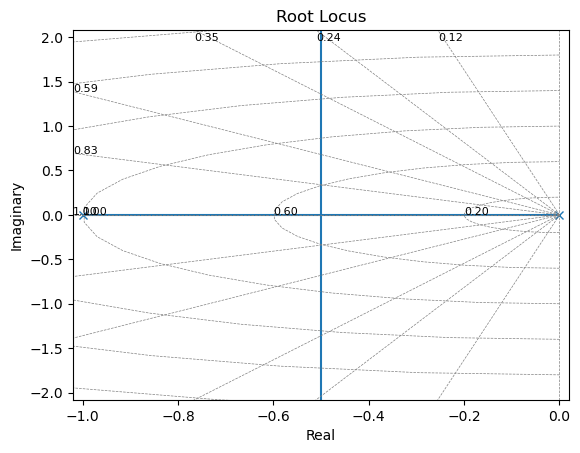

In [ ]:
control.rlocus(G_s);

The closed-loop transfer function is:

In [ ]:
G_cc = control.feedback(G_s, 1, -1)
print(G_cc)


     10
------------
s^2 + s + 10



with closed loop poles:

[-0.5+3.122499j -0.5-3.122499j]


(-4.0, 4.0)

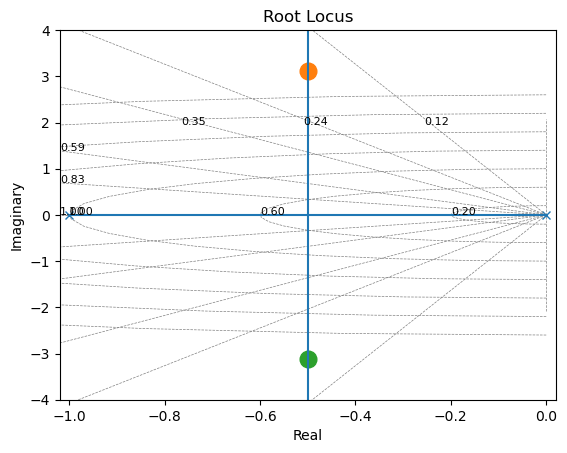

In [ ]:
fig = plt.figure()
closed_loop_poles = np.roots([1, 1, 10])
print(closed_loop_poles)

control.rlocus(G_s);
plt.plot(np.real(closed_loop_poles[0]), np.imag(closed_loop_poles[0]),
         np.real(closed_loop_poles[1]), np.imag(closed_loop_poles[1]), marker='o',  markersize=12)
plt.ylim((-4, 4))

- Natual frequency is $\omega_n=\sqrt{10}=3.16 rad/s$
- Damping ratio is $\xi=0.5/\sqrt{10}=0.1581$

Because the damping ratio is small, this system will have a large overshoot in the step response and is not desirable.

Text(0, 0.5, 'outputs')

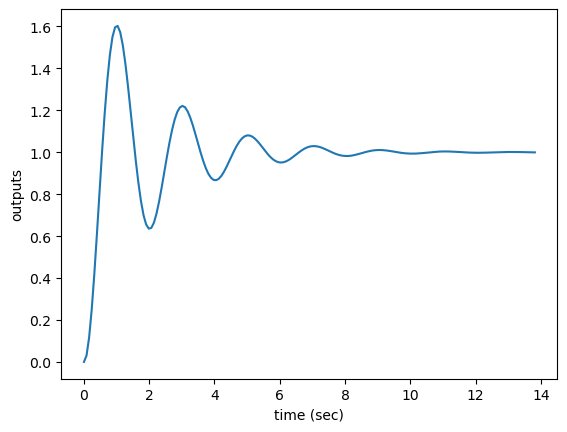

In [ ]:
fig = plt.figure()
[tout, yout] = control.step_response(G_cc)

plt.plot(tout, yout)
plt.xlabel('time (sec)')
plt.ylabel('outputs')

- We add a Lead compansator to improve its performance
   - Damping ratio $\xi=0.5$
   - Natural frequency $\omega_n=3$ rad/s
   
This means having closed loop poles:

$$
S^2 + 2\xi + \omega_n^2 = s^2 + 3s + 9
$$

or $s=-1.5\pm 2.5981j$ 

In [ ]:
np.arccos(.5)*180/3.14

60.03043287114254

- We cannot move the closed-loop poles to the new desired location simply changing the gain

### Procedure
1. Find the sum of the angles at the desired location of one of the dominant closed-loop poles with the open-loop poles and zeros of the original system
2. Determine the necessary angle $\phi$ to be added so that the total sum of the angles is equal to $180°(2k + 1)$ (phase condition).
3. The lead compensator must contribute this angle $\phi$ (more than one network might be needed if $\phi$ is quite large).

The angle from the pole at the origin to the desired dominant closed-loop pole:

In [ ]:
np.rad2deg(np.arctan2(2.5981, -1.5))

119.99977283671743

The angle from the pole at $s=–1$ to the desired closed-loop pole is:

In [ ]:
np.rad2deg(np.arctan2(2.5981, -1.5+1))

100.89329729362939

Angle deficiency to satisfy the phase condition of the root locus:

$$
Angle\; Deficiency=180-120-100.894=-40.894
$$

This must be contributed by a lead compensator.

**Note that the solution to such a problem is not unique. There are infinitely many solutions.**

### Method

1. Draw a horizontal line passing through the desired location for one of the dominant closed-loop poles (we call this P)
2. Draw a line connecting point P and the origin. 
3. Bisect the resuting PAO angle
4. Draw two lines $PC$ and $PD$ that make angles $\pm \phi/2$ with the bisector PB.
5. The intersections of $PC$ and $PD$ with the negative real axis give the necessary locations for the pole and zero of the lead network
6. The open-loop gain is determined by use of the magnitude condition
7. This procedure will push the pole to the left as mush as possible, which can be beneficial


<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/compensator-example-1.png" alt="compensator-example-1" style="height: 350px;"/> </td>
</tr>
</table>


In our case:

- zero at $s=–1.9432$
- pole at $s=–4.6458$

and the lead compensator is:

$$
R(s) = K\frac{s+1.9432}{s+4.6458}
$$

We can then use the magnitude condition to obtain the value of $K$:

$$
\Big |K\frac{s+1.9432}{s+4.6458}\frac{10}{s(s+1)} \Big|_{s=-1.5 + 2.5981j} = 1
$$

$$
K = 1.2287
$$

In [ ]:
G_s = 1.2287*(s+1.9432)/(s+4.6458)*10/(s*(s+1))
print(G_s)


     12.29 s + 23.88
-------------------------
s^3 + 5.646 s^2 + 4.646 s



In [ ]:
G_cc_compensated = control.feedback(G_s, 1, -1)
print(G_cc_compensated)


         12.29 s + 23.88
---------------------------------
s^3 + 5.646 s^2 + 16.93 s + 23.88



[-0.5+3.122499j -0.5-3.122499j]


(-4.0, 4.0)

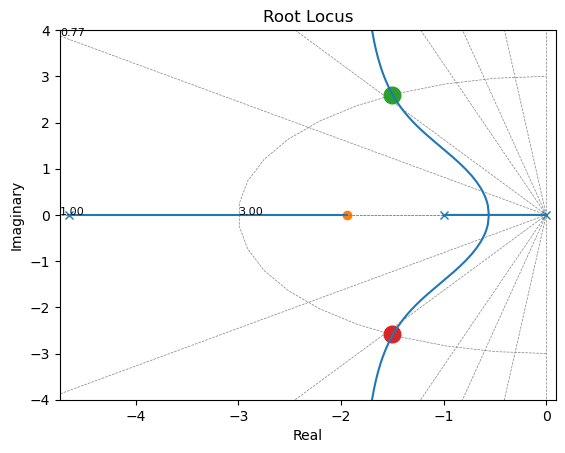

In [ ]:
fig = plt.figure()
desired_closed_loop_poles = [-1.5+2.5881j, -1.5-2.5881j]
print(closed_loop_poles)

control.rlocus(G_s);
plt.plot(np.real(desired_closed_loop_poles[0]), np.imag(desired_closed_loop_poles[0]),
         np.real(desired_closed_loop_poles[1]), np.imag(desired_closed_loop_poles[1]), marker='o',  markersize=12)
plt.ylim((-4, 4))

### Wait we have three closed-loop poles

Third closed-loop pole of the designed system is found by dividing the characteristic equation by the known factors:

$$
s^3 + 5.646s^2 + 16.933s + 23.875 = (s + 1.5 + j2.5981)(s + 1.5 - j2.5981)(s + 2.65)
$$

Text(0, 0.5, 'outputs')

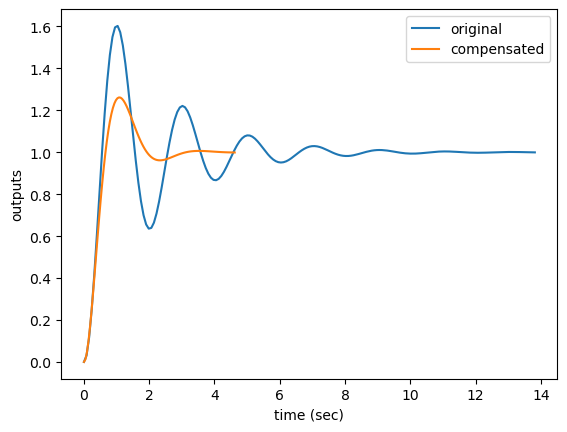

In [ ]:
fig = plt.figure()

[tout, yout] = control.step_response(G_cc)
[tout_c, yout_c] = control.step_response(G_cc_compensated)

plt.plot(tout, yout, label='original')
plt.plot(tout_c, yout_c, label='compensated')
plt.legend()
plt.xlabel('time (sec)')
plt.ylabel('outputs')

--------------------

## Designing a Lag Compensator with the Root Locus

$$
R(s) = \frac{\frac{s}{w_z}+1}{\frac{s}{w_p}+1} = \frac{w_p}{w_z}\frac{s + w_z}{s + w_p}
$$

- one real pole and one real zero
- $w_z > w_p$
- $K=\frac{w_p}{w_z}$ (gain)

We can re-write the above equation as:

$$
R(s) = \frac{\tau_z s + 1}{\tau_p s + 1}
$$

- The transfer function has the same structure
- We can use the same design technique that we saw for the Lead Compensators

- With a Phase Lag compensator we can move our dominant poles closer to the imaginary axis
- This is however not the main reason Lag Compensators
- **Lag Compensators are useful to address steady state errors**
   - e.g., error to the step input
   - improve steady state errors, without changing the position of the dominant poles (they are already where we need them)
   - this means we do not want shape the root locus very much
   
The system exhibits satisfactory transient-response characteristics but unsatisfactory steady-state characteristics. This means that the root locus in the neighborhood of the dominant closed-loop poles should not be changed appreciably but we want to increase the open-loop gain to achieve desired state-state performance.

- To avoid an appreciable change in the root loci, the angle contribution of the lag network should be limited to a small amount, say less than 5°. 
- To assure this, we place the pole and zero of the lag network relatively close together and near the origin of the s plane. 

### How does a lag compensator reduce $E_{ss}$

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/standard-control-loop.png" alt="standard-control-loop" style="width: 550px;"/> </td>
</tr>
</table>


Where:
$$
G(S) = \frac{N(s)}{D(s)}
$$

and our Lag compensator is:

$$
R(s) = \frac{s-z}{s-p}
$$

and the input is $U(s)$.

The steady state error for the uncompensated system is:

$$
E_{ss}  = \lim_{s\rightarrow0} s \cdot \frac{U(s)}{1+\frac{N(s)}{D(s)}}
$$

For a step input: $U(s)=\frac{1}{s}$

$$
\Rightarrow E_{ss}  = \lim_{s\rightarrow0} s \cdot \frac{U(s)}{1+\frac{N(s)}{D(s)}} = \frac{D(0)}{D(0)+N(0)}
$$

The steady state error for the compensated system is:

$$
E_{ss} = \lim_{s\rightarrow0} s \cdot \frac{U(s)}{1+\frac{N(s)(s-z)}{D(s)(s-p)}}
$$


For a step input: $U(s)=\frac{1}{s}$

$$
\Rightarrow E_{ss,c} = \lim_{s\rightarrow0} s \cdot \frac{U(s)}{1+\frac{N(s)(s-z)}{D(s)(s-p)}} = \frac{D(s)(s-p)}{D(s)(s-p)+N(s)(s-z)}\Big|_{s\rightarrow0} = \frac{D(0)p}{D(0)p+N(0)z}
$$

$$
\frac{z}{p} = \frac{D(0)-E_{ss,c}D(0)}{E_{ss,c}N(0)}
$$

- We can choose $E_{ss,c}$ and have the corresponding $\frac{z}{p}$
- To have $E_{ss,c}=0$, $\frac{z}{p} \rightarrow \infty$
- We can only reduce the steady state error and not eliminate it. We need to change the system type to eliminate it


### Example

$$
G(s) = \frac{5s^2+6s+2}{4s^2+s+3}
$$

- Goal: reduce steady state error $E_{ss, c}=0.1$

$$
\frac{z}{p} = \frac{D(0)-E_{ss,c}D(0)}{E_{ss,c}N(s)} = \frac{3-E_{ss, c}\cdot 3}{E_{ss, c}\cdot2} = \frac{3-0.1\cdot3}{0.1\cdot2} = 13.5
$$

- We know the zero/pole ratio
- Where do we place them?
- E.g., $z=-0.1$, $p=-1.35$ or $z=1$, $p=13.5$ would work

Remember that the _Root Locus is where the angles of poles (+) and zeros (-) add to 180 degrees_

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-root-locus-1.png" alt="lead-lag-compensator-root-locus-1" style="width: 250px;"/> </td>
</tr>
</table>

- We do not want to move the location of our roots too much when using a Lag compensator
- The the angle of the poles and zeros of the compensator should be very small (no Root Locus shaping):

$$
\theta_p - \theta_z \approx 0 
$$



- Meeting the condition above while keeping the desired $\frac{z}{p}$ is much easier if we place the zero and pole very close to the imaginary axis
- Practical constraints means you cannot move them too close (resistors and capacitors limits)


Rule of thumb: _the location of the zero is approximately 50 times closer to the imaginary axis as the closer dominant pole_

E.g., 
 - dominant poles at $-1\pm \text{Imag} j$ 
 - zero at $-1/50=0.02$
 - pole at $\Big(\frac{z}{p}\Big)_{des} = \frac{0.02}{p}$

### Example

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/standard-control-loop.png" alt="standard-control-loop" style="width: 550px;"/> </td>
</tr>
</table>

$$
G(s) = \frac{1}{(s+1)(s+3)}
$$

With a Lead compensator to meet stability and rise time requirements
$$
R(s) = \frac{16(s+4)}{(s+9)}
$$

In this case:
$$
E_{ss} = \frac{D(0)}{D(0)+N(0)} = \frac{9\cdot3\cdot1}{9\cdot3\cdot1+16\cdot4}\approx 0.3
$$


Requirement: $E_{ss} =0.1$

$$
\frac{z}{p} = \frac{D(0) -E_{ss} D(0)}{E_{ss} N(0)} = \frac{9\cdot3\cdot1 - 0.1\cdot9\cdot3\cdot1}{0.1\cdot16\cdot4} \approx 3.8
$$

Dominant poles: $s_{1,2} = -3\pm-2j$

- The zero goes to $\frac{-3}{50} = -0.06$
- The Pole goes to $3.8 = \frac{-0.06}{p} \Rightarrow p = -0.6/3.8 = -0.016$


Lag compensator:
$$
R(s) = \frac{s+0.06}{s+0.016}
$$

- We can have the Lag compensator in series with a Lead compensator

Exercise:
- Plot the step response and the impulse respose of the uncompensated and compensated system

In [ ]:
s = control.tf([1, 0],[1])

sys_u = 1/((s+1)*(s+3))*(16*(s+4)/(s+9))
print('sys_u', sys_u)

sys_c = 1/((s+1)*(s+3))*(16*(s+4)/(s+9))*(s+0.06)/(s+0.016)
print('sys_c', sys_c)

sys_u 
       16 s + 64
------------------------
s^3 + 13 s^2 + 39 s + 27

sys_c 
           16 s^2 + 64.96 s + 3.84
---------------------------------------------
s^4 + 13.02 s^3 + 39.21 s^2 + 27.62 s + 0.432



In [ ]:
t_u, yout_u = control.step_response(control.feedback(sys_u, 1), T=100)
t_c, yout_c = control.step_response(control.feedback(sys_c, 1), T=100)

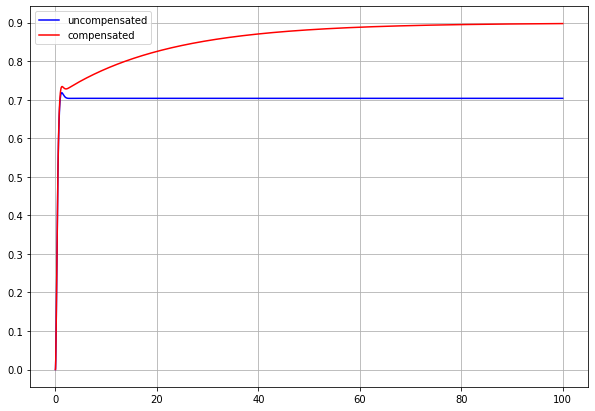

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,7))

plt.plot(t_u, yout_u, color='b', label='uncompensated');
plt.plot(t_c, yout_c, color='r', label='compensated');
plt.grid();
plt.legend();
plt.yticks(np.arange(0, 1, 0.1));

- As expected: the uncompensated system has $E_{ss} = 0.3$
- The compensated system has $E_{ss} = 0.1$
- Settling time does not change very much, as desired


We can see this better looking at the impulse response

In [ ]:
t_u, yout_u = control.impulse_response(control.feedback(sys_u, 1), T=3)
t_c, yout_c = control.impulse_response(control.feedback(sys_c, 1), T=3)

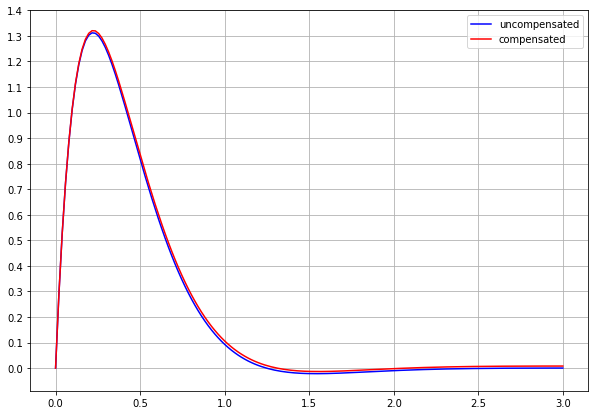

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,7))

plt.plot(t_u, yout_u, color='b', label='uncompensated');
plt.plot(t_c, yout_c, color='r', label='compensated');
plt.grid();
plt.legend();
plt.yticks(np.arange(0, 1.5, 0.1));

- This confirmes that we did not change the position of the dominant poles very much

------

## Designing a Lead Compensator with the Bode Plot

- Let's consider our control loop again:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/standard-control-loop.png" alt="standard-control-loop" style="width: 550px;"/> </td>
</tr>
</table>

- Compensator: Lead compensator, so we need to select one pole and one zero

- First: Convert requirements to frequency domain requirements if needed
  - Gain/Phase margin
  - Bandwidth
  - Gain crossover frequency
  - Zero-frequency magnitude or DC Gain
  - Steady-state error

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-bode-req.png" alt="lead-lag-compensator-bode-req.png" style="width: 550px;"/> </td>
</tr>
</table>

A phase-lead compensator can also be designed using a frequency response approach. A lead compensator in frequency response form is given by the following transfer function:

$$
Lead(s) = \frac{a\tau s + 1}{\tau s + 1}
$$

with $a>1$ (when $a<1$ we would have a lag compensator).

Note that the previous expression is equivalent to the form (which we used for the Root Locus):

$$
Lead(s) = K\frac{s + w_z}{s + w_p}
$$

when $w_p =\frac{1}{\tau}$, $w_z = \frac{1}{a\tau}$, and $K = a$. 

In frequency response design, the phase-lead compensator adds positive phase to the system over the frequency range $\frac{1}{a\tau}$ to $\frac{1}{\tau}$. 

And a Bode plot of a phase-lead compensator $Lead(s)$ has the following form:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-lead1.gif" alt="lead-lag-compensator-lead1" style="width: 550px;"/> </td>
</tr>
</table>

- The two corner frequencies are at $\frac{1}{a\tau}$ and $\frac{1}{\tau}$
- Note the positive phase that is added to the system between these two frequencies. 

- Depending on the value of $a$, the maximum added phase can be up to 90 degrees 
- If you need more than 90 degrees of phase, two lead compensators in series can be employed.

### Example

$$
G(s) = \frac{1}{0.2s+1}
$$

#### System requirements

- Steady state error < 0.02 to a unit ramp input
- Phase margin $> 48$ deg

1. For a ramp unit (assuming a stable system):
  - we need at least a type 1 system to have a finite error (single pole at the origin)
  - we need at least a type 2 system to have a zero error

**Note** we cannot meet our requirements with a lead compensator alone. It does not have a pole at the origin

Our controller needs to have this structure to start from
$$
R(s) = K\frac{1}{s}
$$

and now we can add the lead compensator to deal with the phase margin.

- It is always better to start from the type of the system: adding a pole at the origin will affect your phase.

- Given that a single pole at the origin is enough, we will not add a second one
   - Adds complexity
   - Might reduce stability
   - Do not overdesign!

2. Choose the gain to meet $e_{ss} < 0.02$

For an input $U(s)$:

$$
e_{ss} = \lim_{s\rightarrow0}sE(s) = s \frac{1}{1+G_F(s)}U(s)
$$

where, in this case: 

$$
G_F(s) = G(s)K\frac{1}{s}
$$

$$
Ramp = \frac{1}{s^2}
$$

If we plug in the numbers:

$$
e_{ss} = \lim_{s\rightarrow0}sE(s) = s \frac{1}{s^2}\frac{0.2s^2+s}{0.2s^2+s+K+1} < 0.02 \Rightarrow K > 49
$$

We can then choose:

$$
R(s) = 50\frac{1}{s}
$$

Let's now draw the Bode plot:

- Bring the system in the Bode form
- Sketch the Bode Diagram for each individual part 
- Add them all up

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-bode-example-result.png" alt="lead-lag-compensator-bode-example-result" style="width: 550px;"/> </td>
</tr>
</table>

Let's check it with Python

In [ ]:
s = control.tf([1, 0], [1])
G_s = 1/(0.2*s+1)
R_s = 50/s

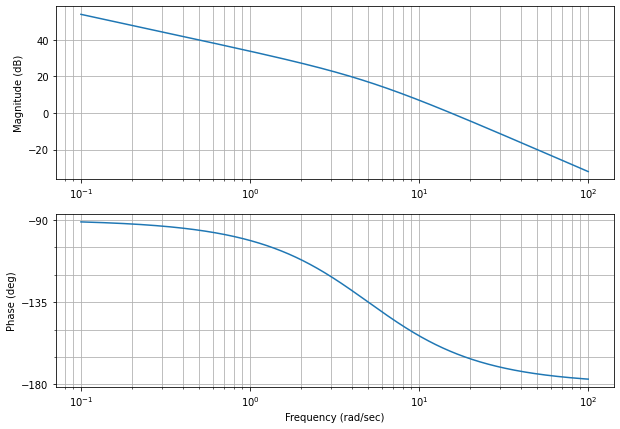

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,7))
control.bode_plot(G_s*R_s, dB=True);

In [ ]:
[gm, pm, _, pm_f] = control.margin(G_s*R_s)

print('Phase margin: deg', pm, 'at rad/s', pm_f)

Phase margin: deg 17.964235916371393 at rad/s 15.421164188583809


We do not respect our phase margin requirement $18<48$

- A lead compensator adds phase for a specific frequency range
- We also add gain, which means we move the crossover frequency to higher frequency

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-lead-bode-ex-1.png" alt="lead-lag-compensator-lead-bode-ex" style="width: 550px;"/> </td>
</tr>
</table>

- To determin how much phase let's look at the lead compensator equations, which we can re-write in this form to highlight the relative relationship between the pole and the zero:

$$
Lead(s) = \frac{a\tau s + 1}{\tau s + 1}
$$

- In this form, the steady state gain is 1 (0 dB). Does not affect the steady state we already determined.
- $a > 1$ to be a lead compensator 
- $a < 1$ is a lag compensator

From the equation above it is easy to verfy that the following equations can be used to determine significant points of the response:

**Upper cutoff frequency**
$$
w_u = \frac{1}{a\tau}
$$

- gain starts to increase

**Lower cutoff frequency**

$$
w_l = \frac{1}{\tau}
$$

- gain starts to flatten out

**Max phase** (obtained at the center frequency $w_m$)

$$
\Phi_{max} = \sin^{-1} \Big( \frac{a-1}{a+1} \Big)
$$

**Freq at Max phase**
$$
w_{m} = \frac{1}{\tau\sqrt{a}}
$$


**Gain at Max phase**
$$
Gain_{m} = \sqrt{a}
$$

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-lead-bode-ex-2.png" alt="lead-lag-compensator-lead-bode-ex" style="width: 550px;"/> </td>
</tr>
</table>

Choosing $a$ and $\tau$:

1. Choose the maximum phase you would like to add $\Phi_{max}$ and solve for $a$
2. Choose the frequency $w_{m}$ where you would like to add $\Phi_{max}$ and solve for $\tau$

- We would get a lower phase increase
- Trial and error is an option
   - Add a safety factor (e.g., 15 deg)


Let's go back to our design
 - We need 30 deg more at 15 rad/s (from 18 to 38)
 - We add some safety factor: 
 
 
 $$
 \Phi_{max} = \sin^{-1} \Big( \frac{a-1}{a+1} \Big) = 37 \Rightarrow a=4
 $$
 
**Freq at Max phase**
$$
w_{m} = \frac{1}{\tau\sqrt{a}} = 22.2 rad/s \Rightarrow \tau=0.022
$$



In [ ]:
# to find a:
import numpy as np
print(np.sin(37*3.14/180))
1.6/0.4 # a

0.6015535345767008


4.0

Final controller:

$$
R(s) = 50\frac{1}{s}\frac{0.088s+1}{0.022s+1}
$$

And we should verify that we obtain the desired phase margin plotting the Bode plot.

Let's plot the Bode plots for 
- the initial controller (in blue)
$$
R(s) = G(s)\frac{50}{s}
$$

- the final lead compensator (in orange)
$$
R(s) = 50\frac{1}{s}\frac{0.088s+1}{0.022s+1}
$$

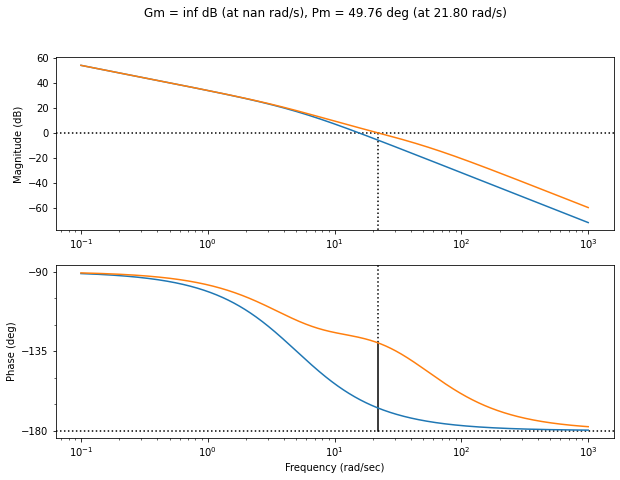

In [ ]:
s = control.tf([1, 0], [1])
G_s = 1/(0.2*s+1)
R_s = 50/s*(0.088*s+1)/(0.022*s+1)

fig, ax = plt.subplots(1, figsize=(10,7))
control.bode_plot(G_s*50/s, dB=True, wrap_phase=True, omega_limits=[0.1, 1000]);

control.bode_plot(G_s*R_s, dB=True, margins=True, wrap_phase=True, omega_limits=[0.1, 1000]);

- The gain plot did not change too much
- We can see the lead compensator as a delta that we sum to the uncompensated Bode plot

- We can only add up to $\Phi_{max}= 90$ deg (there is only one zero)
- In practice: $\Phi_{max} < 55$ deg

- More phase lead needed means two lead compensators in series

------------

## Designing a Lag Compensator with the Bode Plot

- Let's consider our control loop again:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/standard-control-loop.png" alt="standard-control-loop" style="width: 550px;"/> </td>
</tr>
</table>


$$
G(s) = \frac{1}{0.2s+1}
$$

#### System requirements

- Steady state error < 0.02 to a unit ramp input
- Phase margin $> 48$ deg

When we designed the Lead compensator using the Bode plots:

- We saw we need a type 1 system at least, and then we chose the gain $K$ to meet our steady state error requirement

We designed an initial controller:

$$
R(s) = \frac{50}{s}
$$

- Achieves requirement 1, but not 2

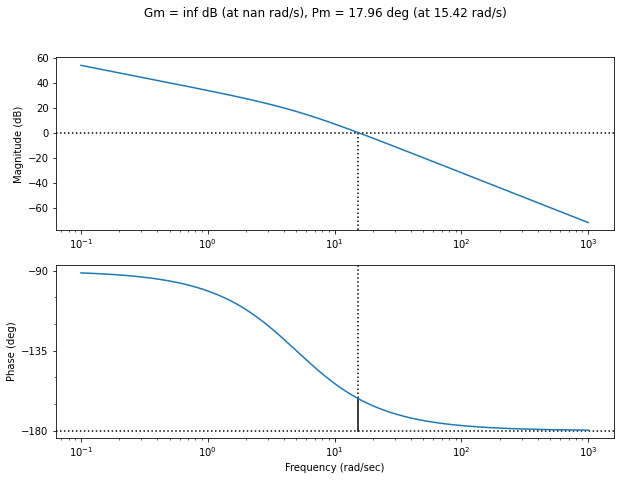

In [ ]:
s = control.tf([1, 0], [1])
G_s = 1/(0.2*s+1)
R_s = 50/s

fig, ax = plt.subplots(1, figsize=(10,7))

control.bode_plot(G_s*R_s, dB=True, margins=True, wrap_phase=True, omega_limits=[0.1, 1000]);

- Before, we used a Lead compensator to meet our phase requirement, with the final controller that was:

$$
R_s = \frac{50}{s}\frac{(0.088s+1)}{(0.022*s+1)}
$$



- **We could use a Lag compensator to meet our phase margin requirement**

- But with the Lag compensator we meet the requirement changing the gain crossover frequency

- Note that we want to still retain the performance we obtained before with the partially compensated system (i.e., when we were using the controller $\frac{50}{s}$. This means that we do not want to change the DC gain because that has been set to achieve the steady state requirements

Let's consider a typical Lag Compensator Bode Plot.

And to do so, we consider:

$$
R_{lag}(s) = \frac{2s+1}{4s+1}
$$

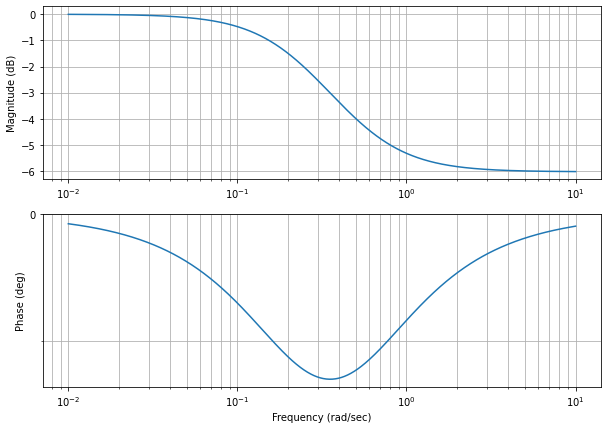

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,7))
control.bode_plot((2*s+1)/(4*s+1), dB=True, wrap_phase=True);

- A low frequency, the gain is 1 (0 dB)
- Useful because we do not want to change our DC gain
- At high frequency, the magnitude is 1/2 or -6dB (for this specific choice of zero/pole)


- We want to leverage the high frequency attentuation with a relative flat frequency shift to move the crossover frequency and the 0dB DC gain at low frequency not to impact the steady state regime
- This means:
  - We need to have the high frequency attenuation in the frequency range of the Bode plot that we want to shape
  - We need to push the phase lag to lower frequencies as much as possible

Let's go back to our Bode Plot

In [ ]:
# Uncomment the following lines if you want to plot the Bode Plot below
# s = control.tf([1, 0], [1])
# G_s = 1/(0.2*s+1)
# R_s = 50/s

# fig, ax = plt.subplots(1, figsize=(10,7))

# control.bode_plot(G_s*R_s, dB=True, margins=True, wrap_phase=True, omega_limits=[0.1, 1000]);

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/lead-lag-compensator-design-lag-compensator.png" alt="lead-lag-compensator-design-lag-compensator" style="width: 550px;"/> </td>
</tr>
</table>

- We would need to decrease the gain by about 18 dB to have a crossover frequency with a 48 degree phase margin
- Add a safety margin (e.g., drop the gain by 20 dB to add some safety)


- Let's calculate how to have a drop in gain of 20dB or 10 at high frequency:

$$
R(s) = \frac{\tau_z\cdot s +1}{\tau_p\cdot s +1} \Rightarrow \frac{\tau_z}{\tau_p} = 10
$$

or, the relative ratio between the zero and the pole is 10:

$$
\frac{\tau_z s+1}{10\tau_p s+1}
$$

- We want the phase lag as low frequency as possible.
- We need the zero and poles as close to the imaginary axis as possible (or $\tau$ as large as possible)
- The larger $\tau$, the closer to the imaginary axis is the pole-zero pair, the less the lag compensator interfere with the original system, while still acting to improve our phase margin
- This is the same approach that we used for the Root Locus to design the Lag compensator

_Rule of thumb: place the zero 50 times closer to the origin as the dominant poles_

For our case, we have a pole at $s=5$, which means we would like a zero at $s=(1/50)*5$,
or if we use the time-constant representation $0.2*50$:

$$
Lag(s) = \frac{10s+1}{100s+1}
$$


And here is the final controller:

$$
R(s) = \frac{50}{s}\frac{10s+1}{100s+1}
$$

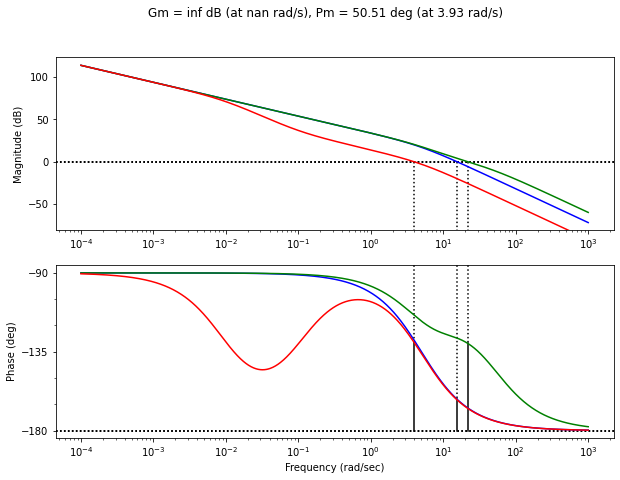

In [ ]:
s = control.tf([1, 0], [1])

# System G(s)
G_s = 1/(0.2*s+1)

# Partial Compensator P(s)
P_s = 50/s

# Lead Compensator Lead(s)
Lead_s = (0.088*s+1)/(0.022*s+1)

# Lag Compensator Lag(s)
Lag_s = (10*s+1)/(100*s+1)

# Lead Lag compensator
R_s = 50/s*Lead_s*Lag_s

# create the axis and figure
fig, ax = plt.subplots(1, figsize=(10,7))

# Blue, uncompensated
control.bode_plot(P_s*G_s, dB=True, margins=True, wrap_phase=True, omega_limits=[0.0001, 1000], color='b');

# Green, Lead compensated
control.bode_plot(P_s*G_s*Lead_s, dB=True, margins=True, wrap_phase=True, omega_limits=[0.0001, 1000], color='g');

# Red, Lag compensated
control.bode_plot(P_s*G_s*Lag_s, dB=True, margins=True, wrap_phase=True, omega_limits=[0.0001, 1000], color='r');

- Compare the phase maring of both the Lead Compensated, and the Lag Compensated
- At low frequency the DC gain has not changed for any system
- With the Lag compensator we moved the cross-over frequency to lower frequency: we slowed down the system

We can see this plotting the step response

In [ ]:
t_o, yout_o = control.step_response(control.feedback(P_s*G_s, 1), T=5)
t_lead, yout_lead = control.step_response(control.feedback(P_s*G_s*Lead_s, 1), T=5)
t_lag, yout_lag = control.step_response(control.feedback(P_s*G_s*Lag_s, 1), T=5)

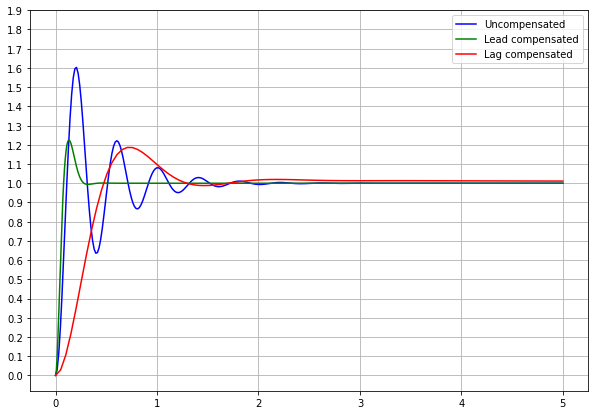

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,7))

plt.plot(t_o, yout_o, color='b', label='Uncompensated');
plt.plot(t_lead, yout_lead, color='g', label='Lead compensated');
plt.plot(t_lag, yout_lag, color='r', label='Lag compensated');

plt.grid();
plt.legend();
plt.yticks(np.arange(0, 2, 0.1));

- The original system is less stable
- The Lead compensated is very fast
- The Lag compensated is slower

Note: 
- A slower system does not react to high frequency noise as much, and this tends to be better
- If we do not need to track fast signals, a slower system can be better

### Final comments
- Lead compensation basically speeds up the response and increases the stability of the system. 
- Lag compensation improves the steady-state accuracy of the system, but reduces the speed of the response.
- If improvements in both transient response and steady-state response are desired, then both a lead compensator and a lag compensator may be used simultaneously. 

- This type of lead/lag compensators is designed in the frequency domain by determining $a$ from the amount of phase needed to satisfy the phase margin requirements, and determing $\tau$ to place the added phase at the new gain-crossover frequency.
- The lead compensator increases the gain of the system at high frequencies (the amount of this gain is equal to $a$). This can increase the crossover frequency, which will help to decrease the rise time and settling time of the system (but may amplify high frequency noise).
- A lead-lag compensator combines the effects of a lead compensator with those of a lag compensator. The result is a system with improved transient response, stability, and steady-state error. 
- To implement a lead-lag compensator, first design the lead compensator to achieve the desired transient response and stability, and then design a lag compensator to improve the steady-state response of the lead-compensated system.